In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 500)
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('malaysia_produce.csv')
df_LCU, df_SLC, df_USD, df_PPI = [df[df.Element == 'Producer Price (LCU/tonne)'], 
df[df.Element == 'Producer Price (SLC/tonne)'],
df[df.Element == 'Producer Price (USD/tonne)'], df[df.Element == 'Producer Price Index (2014-2016 = 100)']]

## Distribution of Yearly Data to Produce Indexes 

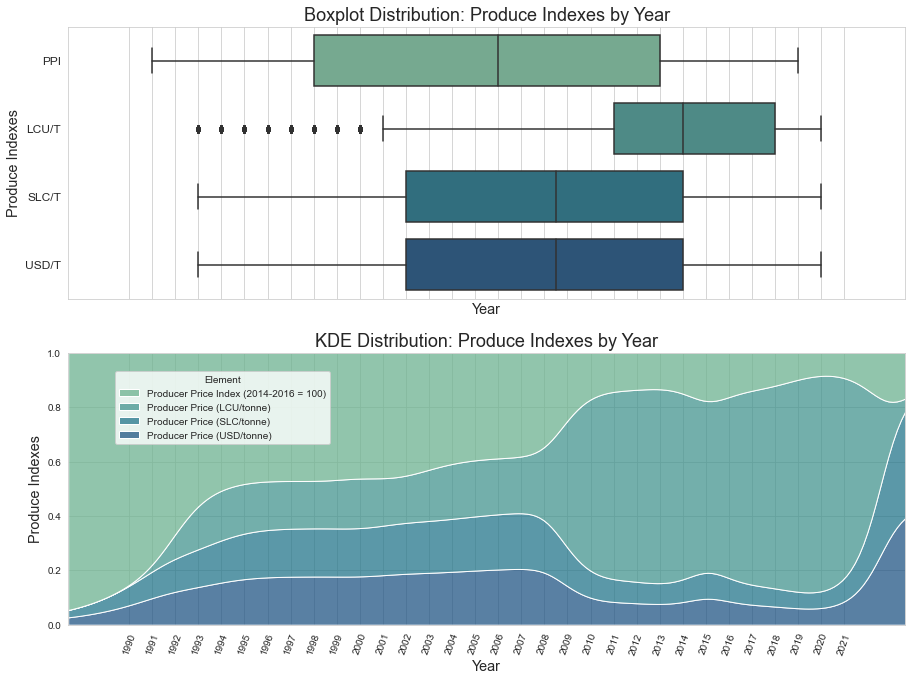

In [81]:
#Setting up figure
plt.rcParams["figure.figsize"] = (15,11)
f, ax = plt.subplots(2, sharex=True)

#Plotting Box Plot of Distribution of Produce Index by Year
sns.boxplot(
    data=df, 
    x = 'Year', 
    y = 'Element', 
    width = 0.75, 
    palette= 'crest', 
    ax= ax[0]
)
ax[0].set_xticks(np.arange(1990, 2022 ,1))
ax[0].set_xticklabels(np.arange(1990, 2022 ,1), rotation = 70, fontsize = 'medium')
ax[0].set_yticklabels(['PPI', 'LCU/T', 'SLC/T', 'USD/T'],rotation = 0, fontsize = 'large')
ax[0].set_title('Boxplot Distribution: Produce Indexes by Year', fontdict={'fontsize':18})
ax[0].set_xlabel('Year', fontsize = 'x-large')
ax[0].set_ylabel('Produce Indexes', fontsize = 'x-large')

#Plotting KDE Plot of Distribution of Produce Index by Year
sns.kdeplot(
    data = df, 
    x = 'Year', 
    hue = 'Element', 
    legend=True, 
    multiple = 'fill',
    palette= 'crest',
    ax = ax[1]
)
ax[1].set_xticks(np.arange(1990, 2022 ,1))
ax[1].set_xticklabels(np.arange(1990, 2022 ,1), rotation = 70, fontsize = 'medium')
ax[1].set_title('KDE Distribution: Produce Indexes by Year', fontdict={'fontsize':18})
ax[1].set_xlabel('Year', fontsize = 'x-large')
ax[1].set_ylabel('Produce Indexes', fontsize = 'x-large')
sns.move_legend(ax[1], bbox_to_anchor=(0.05, 0.95), loc='upper left')

plt.show()

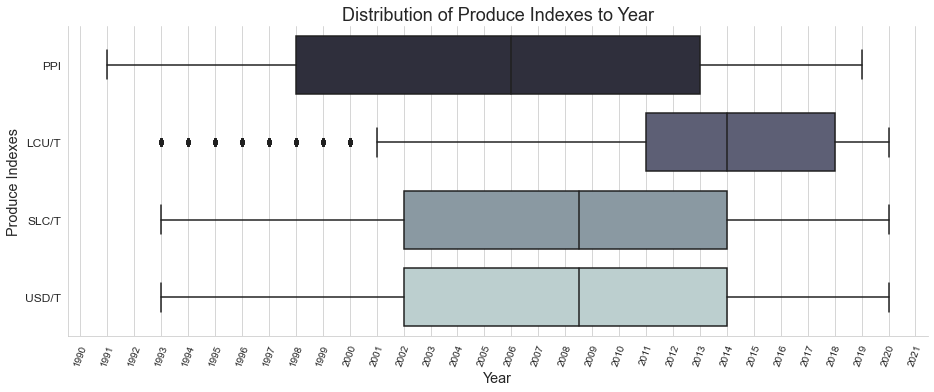

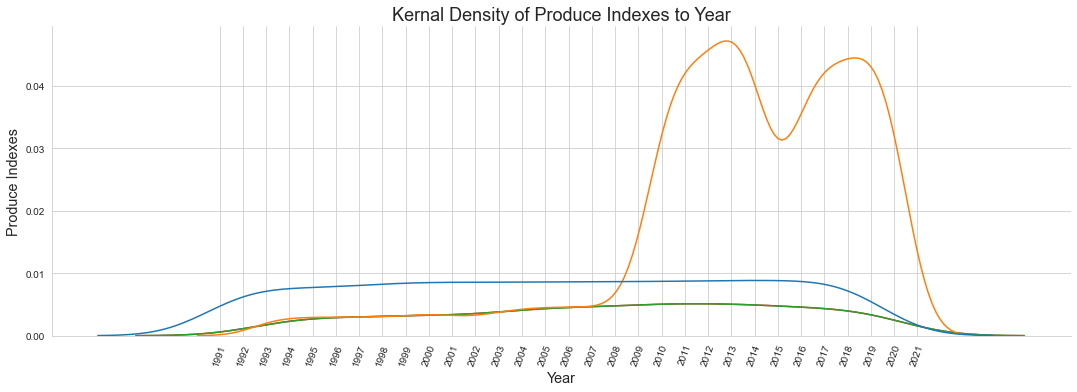

In [26]:
g = sns.catplot(data=df, x = 'Year', y = 'Element', kind = 'box', width = 0.75, aspect = 3, palette= 'bone')

# NOTE: set_xticks on the axis to determine the range of ticks to plot the data accordingly to
# then, plot the xticklabels to chart relevant labels to each point of tick
# must be done in correct order, set xtick to determine points > set xtick labels to label them

g.ax.set_xticks(np.arange(1990, 2022 ,1))
g.set_xticklabels(np.arange(1990, 2022 ,1), rotation = 70, fontsize = 'medium')
g.set_yticklabels(['PPI', 'LCU/T', 'SLC/T', 'USD/T'],rotation = 0, fontsize = 'large')
g.ax.set_title('Distribution of Produce Indexes to Year', fontdict={'fontsize':18})
g.ax.set_xlabel('Year', fontsize = 'x-large')
g.ax.set_ylabel('Produce Indexes', fontsize = 'x-large')
#g.axes_dict.items()

h = sns.displot(df, x = 'Year', kind = 'kde', aspect = 3, hue='Element', legend=False)
h.ax.set_xticks(np.arange(1990, 2022 ,1))
h.set_xticklabels(np.arange(1990, 2022 ,1), rotation = 70, fontsize = 'medium')
h.ax.set_title('Kernal Density of Produce Indexes to Year', fontdict={'fontsize':18})
h.ax.set_xlabel('Year', fontsize = 'x-large')
h.ax.set_ylabel('Produce Indexes', fontsize = 'x-large')
plt.show()

## Total Distribution of Prices in LCU Index (Below 20000)

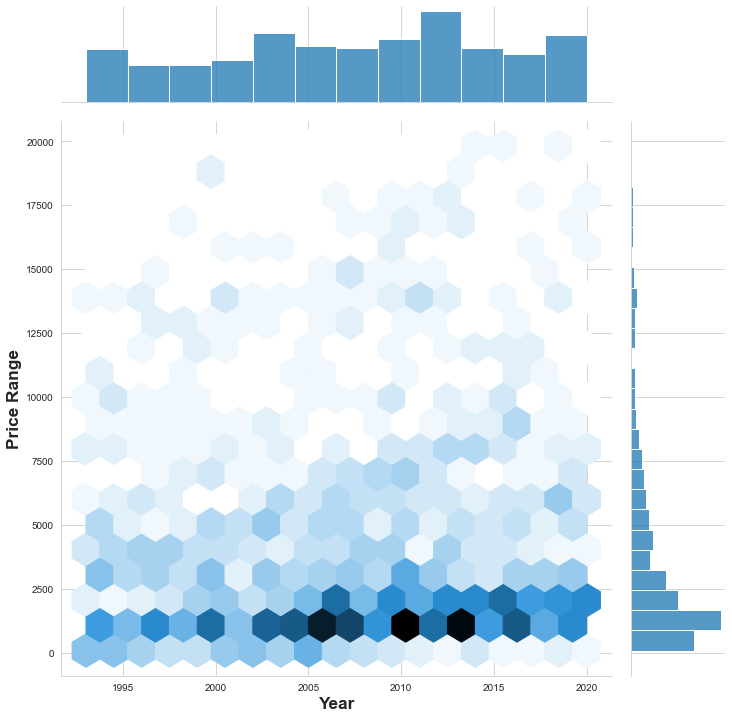

In [70]:
plot1 = sns.jointplot(data= df_LCU[(df_LCU.Months == 'Annual value') & (df_LCU.Value < 20000)], 
                  x = 'Year', y = 'Value', kind = 'hex', height = 10, palette= 'crest')
plot1.ax_joint.set_xlabel('Year', fontweight='bold', fontsize = 'xx-large')
plot1.ax_joint.set_ylabel('Price Range', fontweight='bold', fontsize = 'xx-large')
plt.show()